In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error
import tensorflow as tfç
import tensorflow_decision_forests as tfdf
import pickle

/tmp/ipykernel_348228/2714705594.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-13 16:01:48.334365: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-13 16:01:48.464301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 16:0

In [49]:
data = pd.read_csv('./data/clean/diamondsdlfe2xso.csv')

In [50]:
data = data.drop('Unnamed: 0',axis=1)
data


,price,carat,depth,table,x,y,z,cut,color,clarity,city,x/y,td,ad,c3
0,4268,1.21,62.400000,58.0,6.83,6.79,4.25,4.0,1.0,4.0,1.069918,1.005891,0.929487,0.006139,9.0
1,505,0.32,63.000000,57.0,4.35,4.38,2.75,3.0,3.0,4.0,1.056107,0.993151,0.904762,0.006107,10.0
2,2686,0.71,65.500000,55.0,5.62,5.53,3.65,1.0,4.0,5.0,1.038843,1.016275,0.839695,0.006259,10.0
3,738,0.41,63.800000,56.0,4.68,4.72,3.00,2.0,7.0,3.0,1.056107,0.991525,0.877743,0.006187,12.0
4,4882,1.02,60.500000,59.0,6.55,6.51,3.95,5.0,4.0,3.0,1.069918,1.006144,0.975207,0.006056,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,62.700000,57.0,7.10,7.04,4.43,5.0,4.0,5.0,1.035822,1.008523,0.909091,0.006052,14.0
40451,12615,2.02,57.457665,60.0,8.31,8.25,4.73,2.0,5.0,2.0,1.036038,1.007273,1.044247,0.006229,9.0
40452,5457,1.01,62.700000,56.0,6.37,6.42,4.01,5.0,3.0,3.0,1.056107,0.992212,0.893142,0.006159,11.0
40453,456,0.33,61.900000,54.3,4.45,4.47,2.76,5.0,1.0,5.0,1.056107,0.995526,0.877221,0.006011,11.0


In [51]:
data.columns
X = data

In [52]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


X_train, X_valid = split_dataset(data)
print("{} examples in training, {} examples for testing.".format(
    len(X_train), len(X_valid)))

28249 examples in training, 12206 examples for testing.


In [53]:
X_train

,price,carat,depth,table,x,y,z,cut,color,clarity,city,x/y,td,ad,c3
2,2686,0.71,65.500000,55.0,5.62,5.53,3.65,1.0,4.0,5.0,1.038843,1.016275,0.839695,0.006259,10.0
3,738,0.41,63.800000,56.0,4.68,4.72,3.00,2.0,7.0,3.0,1.056107,0.991525,0.877743,0.006187,12.0
4,4882,1.02,60.500000,59.0,6.55,6.51,3.95,5.0,4.0,3.0,1.069918,1.006144,0.975207,0.006056,12.0
5,9057,1.52,61.200000,57.0,7.45,7.39,4.54,5.0,5.0,2.0,1.005179,1.008119,0.931373,0.006081,12.0
6,3733,1.01,65.200000,56.0,6.23,6.19,4.05,1.0,3.0,4.0,1.054812,1.006462,0.858896,0.006467,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40447,3349,0.91,64.100000,62.0,6.06,6.01,3.87,2.0,7.0,2.0,1.040138,1.008319,0.967239,0.006456,11.0
40449,3710,0.71,61.900000,56.0,5.69,5.72,3.53,5.0,5.0,5.0,1.056107,0.994755,0.904685,0.006180,15.0
40450,10070,1.34,62.700000,57.0,7.10,7.04,4.43,5.0,4.0,5.0,1.035822,1.008523,0.909091,0.006052,14.0
40451,12615,2.02,57.457665,60.0,8.31,8.25,4.73,2.0,5.0,2.0,1.036038,1.007273,1.044247,0.006229,9.0


In [54]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train, label="price", task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_valid, label="price", task = tfdf.keras.Task.REGRESSION)
X_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X, label="price", task = tfdf.keras.Task.REGRESSION)

In [55]:
gbm = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION,num_trees= 300,max_depth=6)
gbm.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmp6vy0t2sp as temporary training directory


[WARNING 24-02-13 16:16:06.3803 CET gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-02-13 16:16:06.3803 CET gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-02-13 16:16:06.3803 CET gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [56]:
gbm.fit(x=train_ds)

Reading training dataset...


Training dataset read in 0:00:00.207821. Found 28249 examples.
Training model...
Model trained in 0:00:02.119502
Compiling model...


[INFO 24-02-13 16:16:09.4664 CET kernel.cc:1233] Loading model from path /tmp/tmp6vy0t2sp/model/ with prefix 41e2471eebc149a1
[INFO 24-02-13 16:16:09.4711 CET abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-02-13 16:16:09.4711 CET kernel.cc:1061] Use fast generic engine


Model compiled.


In [57]:
tfdf.model_plotter.plot_model_in_colab(gbm, tree_idx=0, max_depth=6)

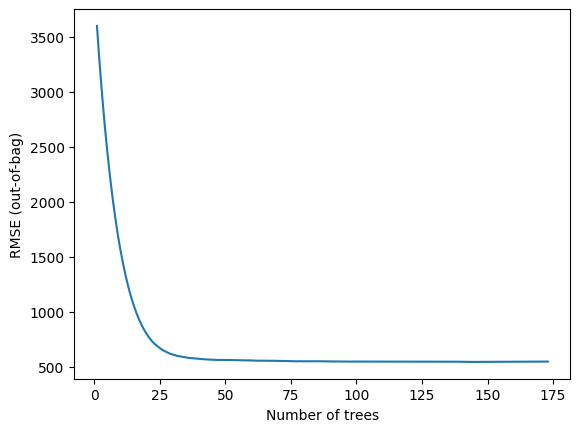

In [58]:
import matplotlib.pyplot as plt
logs = gbm.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [59]:
inspector = gbm.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=None, loss=546.86767578125, rmse=546.86767578125, ndcg=None, aucs=None, auuc=None, qini=None)

In [60]:
gbm.evaluate(valid_ds)[-1] ** 0.5


 1/13 [=>............................] - ETA: 0s - loss: 0.0000e+00 - mse: 345339.2500

13/13 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - mse: 292224.5625


540.5779892855425

In [61]:
evaluation = gbm.evaluate(x=valid_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

13/13 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - mse: 292224.5625

loss: 0.0000
mse: 292224.5625


In [199]:
root_mean_squared_error(y_test,gbm.predict(valid_ds))

13/13 [==============================] - 0s 4ms/step


ValueError: Found input variables with inconsistent numbers of samples: [8091, 12229]

In [157]:
score = cross_val_score(rf,X_ds,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)
score.mean()

TypeError: Singleton array array(<_PrefetchDataset element_spec=({'carat': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'depth': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'table': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'x': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'y': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'z': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'cut': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'color': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'clarity': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'city': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'x/y': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'td': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'ad': TensorSpec(shape=(None,), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
      dtype=object) cannot be considered a valid collection.

In [211]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [212]:
inspector.variable_importances()["INV_MEAN_MIN_DEPTH"]

[("clarity" (1; #4), 0.2300365272808876),
 ("y" (1; #12), 0.2296490042985326),
 ("z" (1; #13), 0.22463503353268968),
 ("color" (1; #5), 0.220430302869763),
 ("carat" (1; #2), 0.21975972303116545),
 ("ad" (1; #1), 0.21141125358182464),
 ("x" (1; #10), 0.21130533087719428),
 ("x/y" (1; #11), 0.20419230587492257),
 ("table" (1; #8), 0.19647730277477146),
 ("td" (1; #9), 0.19535179765390903),
 ("depth" (1; #7), 0.19318387345351493),
 ("cut" (1; #6), 0.18286920711624047),
 ("city" (1; #3), 0.1794371466978292)]

In [213]:
test_file_path = './data/clean/testdl123fexydatdso3x2.csv'
test_data = pd.read_csv(test_file_path)



In [214]:
test_data = test_data [data.drop('price', axis=1).columns]
test_data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity',
       'city', 'x/y', 'td', 'ad'],
      dtype='object')

In [217]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

gbm.fit(x=X_ds)
gbm.make_inspector().evaluation()

Reading training dataset...
Training dataset read in 0:00:00.150241. Found 40455 examples.
Training model...
Model trained in 0:00:00.090443
Compiling model...
Model compiled.


[INFO 24-02-13 16:00:42.5621 CET kernel.cc:1233] Loading model from path /tmp/tmpppmp42u6/model/ with prefix 9dcdbffef7fa4204
[INFO 24-02-13 16:00:42.5695 CET quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-02-13 16:00:42.5704 CET abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-02-13 16:00:42.5704 CET kernel.cc:1061] Use fast generic engine


Evaluation(num_examples=None, accuracy=None, loss=418.5183410644531, rmse=418.5183410644531, ndcg=None, aucs=None, auuc=None, qini=None)

In [218]:
preds = gbm.predict(test_ds)
output = pd.DataFrame({'id': list(range(len(test_data))),
                       'price': preds.squeeze()})

output.head()

14/14 [==============================] - 0s 5ms/step


,id,price
0,0,2807.528076
1,1,5736.129395
2,2,9357.148438
3,3,4178.810059
4,4,1593.920532


In [216]:
output.to_csv('./submissions/tf300X_dsdl123fexydatdso3x2.csv', index=False)

In [138]:
output

,id,price
0,0,2853.439209
1,1,5810.128418
2,2,9582.651367
3,3,4083.331299
4,4,1648.738281
...,...,...
13480,13480,1697.279663
13481,13481,2438.009033
13482,13482,3145.374512
13483,13483,2112.710449


In [139]:
pickle.dump(rf, open('./models/TFGB140dl123xytdadso3x2.sav', 'wb'))